# 순환 신경망 - 나비야
#### 출처: [순환 신경망 모델 만들어보기](https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/)

## 다층 퍼셉트론 모델

In [1]:
# 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [3]:
# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
# 데이터 준비하기

# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [5]:
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [6]:
# 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)
dataset.shape

(50, 5)

In [7]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

MAX_IDX_VALUE = 13

In [8]:
# 입력값 정규화 시키기
x_train = x_train / float(MAX_IDX_VALUE)
x_train.shape

(50, 4)

In [9]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

In [10]:
# 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

W0813 19:52:15.324844 20904 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 19:52:15.386827 20904 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 19:52:15.399820 20904 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [11]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0813 19:52:19.947211 20904 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 19:52:19.984187 20904 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
# 모델 학습시키기
history = model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2)

W0813 19:52:21.938092 20904 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0813 19:52:22.005054 20904 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/2000
 - 1s - loss: 2.4704 - acc: 0.2200
Epoch 2/2000
 - 0s - loss: 2.3682 - acc: 0.3400
Epoch 3/2000
 - 0s - loss: 2.2829 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.2029 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.1220 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.0601 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 1.9955 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 1.9611 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 1.9300 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9112 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.8917 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.8805 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.8628 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.8471 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.8307 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.8199 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.8084 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.7959 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.7827 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.7755 - acc: 0.3400
Epoch 21/2000
 - 0s - loss: 1

Epoch 168/2000
 - 0s - loss: 1.2288 - acc: 0.5400
Epoch 169/2000
 - 0s - loss: 1.2282 - acc: 0.5600
Epoch 170/2000
 - 0s - loss: 1.2294 - acc: 0.5400
Epoch 171/2000
 - 0s - loss: 1.2249 - acc: 0.5400
Epoch 172/2000
 - 0s - loss: 1.2218 - acc: 0.5400
Epoch 173/2000
 - 0s - loss: 1.2104 - acc: 0.5600
Epoch 174/2000
 - 0s - loss: 1.2111 - acc: 0.5600
Epoch 175/2000
 - 0s - loss: 1.2136 - acc: 0.5600
Epoch 176/2000
 - 0s - loss: 1.2076 - acc: 0.5600
Epoch 177/2000
 - 0s - loss: 1.2029 - acc: 0.5400
Epoch 178/2000
 - 0s - loss: 1.2045 - acc: 0.5400
Epoch 179/2000
 - 0s - loss: 1.2056 - acc: 0.5600
Epoch 180/2000
 - 0s - loss: 1.1966 - acc: 0.5600
Epoch 181/2000
 - 0s - loss: 1.1962 - acc: 0.5600
Epoch 182/2000
 - 0s - loss: 1.1972 - acc: 0.5400
Epoch 183/2000
 - 0s - loss: 1.1944 - acc: 0.5400
Epoch 184/2000
 - 0s - loss: 1.1901 - acc: 0.5600
Epoch 185/2000
 - 0s - loss: 1.1902 - acc: 0.5600
Epoch 186/2000
 - 0s - loss: 1.1862 - acc: 0.5800
Epoch 187/2000
 - 0s - loss: 1.1798 - acc: 0.5400


Epoch 332/2000
 - 0s - loss: 0.9388 - acc: 0.6200
Epoch 333/2000
 - 0s - loss: 0.9330 - acc: 0.6000
Epoch 334/2000
 - 0s - loss: 0.9388 - acc: 0.5800
Epoch 335/2000
 - 0s - loss: 0.9424 - acc: 0.5800
Epoch 336/2000
 - 0s - loss: 0.9336 - acc: 0.6000
Epoch 337/2000
 - 0s - loss: 0.9353 - acc: 0.5800
Epoch 338/2000
 - 0s - loss: 0.9360 - acc: 0.5800
Epoch 339/2000
 - 0s - loss: 0.9352 - acc: 0.5800
Epoch 340/2000
 - 0s - loss: 0.9216 - acc: 0.6200
Epoch 341/2000
 - 0s - loss: 0.9307 - acc: 0.6000
Epoch 342/2000
 - 0s - loss: 0.9296 - acc: 0.5800
Epoch 343/2000
 - 0s - loss: 0.9192 - acc: 0.6400
Epoch 344/2000
 - 0s - loss: 0.9227 - acc: 0.5800
Epoch 345/2000
 - 0s - loss: 0.9259 - acc: 0.6000
Epoch 346/2000
 - 0s - loss: 0.9178 - acc: 0.6200
Epoch 347/2000
 - 0s - loss: 0.9239 - acc: 0.5800
Epoch 348/2000
 - 0s - loss: 0.9261 - acc: 0.6000
Epoch 349/2000
 - 0s - loss: 0.9120 - acc: 0.6200
Epoch 350/2000
 - 0s - loss: 0.9159 - acc: 0.6400
Epoch 351/2000
 - 0s - loss: 0.9141 - acc: 0.6000


Epoch 496/2000
 - 0s - loss: 0.7488 - acc: 0.7600
Epoch 497/2000
 - 0s - loss: 0.7458 - acc: 0.7400
Epoch 498/2000
 - 0s - loss: 0.7438 - acc: 0.7000
Epoch 499/2000
 - 0s - loss: 0.7453 - acc: 0.7000
Epoch 500/2000
 - 0s - loss: 0.7420 - acc: 0.7400
Epoch 501/2000
 - 0s - loss: 0.7404 - acc: 0.7200
Epoch 502/2000
 - 0s - loss: 0.7456 - acc: 0.7200
Epoch 503/2000
 - 0s - loss: 0.7433 - acc: 0.7400
Epoch 504/2000
 - 0s - loss: 0.7402 - acc: 0.7600
Epoch 505/2000
 - 0s - loss: 0.7435 - acc: 0.7200
Epoch 506/2000
 - 0s - loss: 0.7522 - acc: 0.7800
Epoch 507/2000
 - 0s - loss: 0.7423 - acc: 0.7000
Epoch 508/2000
 - 0s - loss: 0.7453 - acc: 0.7200
Epoch 509/2000
 - 0s - loss: 0.7335 - acc: 0.7000
Epoch 510/2000
 - 0s - loss: 0.7337 - acc: 0.7400
Epoch 511/2000
 - 0s - loss: 0.7451 - acc: 0.7000
Epoch 512/2000
 - 0s - loss: 0.7273 - acc: 0.7200
Epoch 513/2000
 - 0s - loss: 0.7371 - acc: 0.7200
Epoch 514/2000
 - 0s - loss: 0.7377 - acc: 0.7200
Epoch 515/2000
 - 0s - loss: 0.7283 - acc: 0.7200


Epoch 660/2000
 - 0s - loss: 0.5851 - acc: 0.8200
Epoch 661/2000
 - 0s - loss: 0.5886 - acc: 0.8200
Epoch 662/2000
 - 0s - loss: 0.5893 - acc: 0.7800
Epoch 663/2000
 - 0s - loss: 0.5831 - acc: 0.8800
Epoch 664/2000
 - 0s - loss: 0.5876 - acc: 0.8400
Epoch 665/2000
 - 0s - loss: 0.5744 - acc: 0.8400
Epoch 666/2000
 - 0s - loss: 0.5847 - acc: 0.8200
Epoch 667/2000
 - 0s - loss: 0.5790 - acc: 0.7800
Epoch 668/2000
 - 0s - loss: 0.5767 - acc: 0.8200
Epoch 669/2000
 - 0s - loss: 0.5780 - acc: 0.8200
Epoch 670/2000
 - 0s - loss: 0.5798 - acc: 0.8400
Epoch 671/2000
 - 0s - loss: 0.5809 - acc: 0.8600
Epoch 672/2000
 - 0s - loss: 0.5751 - acc: 0.8800
Epoch 673/2000
 - 0s - loss: 0.5748 - acc: 0.8400
Epoch 674/2000
 - 0s - loss: 0.5755 - acc: 0.8400
Epoch 675/2000
 - 0s - loss: 0.5753 - acc: 0.8400
Epoch 676/2000
 - 0s - loss: 0.5634 - acc: 0.8600
Epoch 677/2000
 - 0s - loss: 0.5746 - acc: 0.8200
Epoch 678/2000
 - 0s - loss: 0.5695 - acc: 0.8000
Epoch 679/2000
 - 0s - loss: 0.5723 - acc: 0.8400


Epoch 824/2000
 - 0s - loss: 0.4591 - acc: 0.9000
Epoch 825/2000
 - 0s - loss: 0.4544 - acc: 0.9000
Epoch 826/2000
 - 0s - loss: 0.4491 - acc: 0.8800
Epoch 827/2000
 - 0s - loss: 0.4492 - acc: 0.9000
Epoch 828/2000
 - 0s - loss: 0.4533 - acc: 0.9000
Epoch 829/2000
 - 0s - loss: 0.4527 - acc: 0.9000
Epoch 830/2000
 - 0s - loss: 0.4554 - acc: 0.8600
Epoch 831/2000
 - 0s - loss: 0.4523 - acc: 0.9000
Epoch 832/2000
 - 0s - loss: 0.4577 - acc: 0.9000
Epoch 833/2000
 - 0s - loss: 0.4424 - acc: 0.9000
Epoch 834/2000
 - 0s - loss: 0.4499 - acc: 0.8800
Epoch 835/2000
 - 0s - loss: 0.4442 - acc: 0.9000
Epoch 836/2000
 - 0s - loss: 0.4479 - acc: 0.9000
Epoch 837/2000
 - 0s - loss: 0.4477 - acc: 0.9000
Epoch 838/2000
 - 0s - loss: 0.4450 - acc: 0.8800
Epoch 839/2000
 - 0s - loss: 0.4443 - acc: 0.9200
Epoch 840/2000
 - 0s - loss: 0.4434 - acc: 0.9000
Epoch 841/2000
 - 0s - loss: 0.4451 - acc: 0.9000
Epoch 842/2000
 - 0s - loss: 0.4483 - acc: 0.9000
Epoch 843/2000
 - 0s - loss: 0.4416 - acc: 0.9000


Epoch 988/2000
 - 0s - loss: 0.3679 - acc: 0.9000
Epoch 989/2000
 - 0s - loss: 0.3682 - acc: 0.9200
Epoch 990/2000
 - 0s - loss: 0.3699 - acc: 0.9200
Epoch 991/2000
 - 0s - loss: 0.3624 - acc: 0.9200
Epoch 992/2000
 - 0s - loss: 0.3635 - acc: 0.9200
Epoch 993/2000
 - 0s - loss: 0.3632 - acc: 0.9000
Epoch 994/2000
 - 0s - loss: 0.3625 - acc: 0.9000
Epoch 995/2000
 - 0s - loss: 0.3552 - acc: 0.9200
Epoch 996/2000
 - 0s - loss: 0.3613 - acc: 0.9200
Epoch 997/2000
 - 0s - loss: 0.3611 - acc: 0.9200
Epoch 998/2000
 - 0s - loss: 0.3549 - acc: 0.9200
Epoch 999/2000
 - 0s - loss: 0.3555 - acc: 0.9200
Epoch 1000/2000
 - 0s - loss: 0.3646 - acc: 0.9200
Epoch 1001/2000
 - 0s - loss: 0.3588 - acc: 0.9200
Epoch 1002/2000
 - 0s - loss: 0.3594 - acc: 0.9200
Epoch 1003/2000
 - 0s - loss: 0.3573 - acc: 0.9200
Epoch 1004/2000
 - 0s - loss: 0.3574 - acc: 0.9200
Epoch 1005/2000
 - 0s - loss: 0.3499 - acc: 0.9200
Epoch 1006/2000
 - 0s - loss: 0.3600 - acc: 0.9200
Epoch 1007/2000
 - 0s - loss: 0.3555 - acc:

Epoch 1149/2000
 - 0s - loss: 0.3028 - acc: 0.9000
Epoch 1150/2000
 - 0s - loss: 0.2967 - acc: 0.9200
Epoch 1151/2000
 - 0s - loss: 0.2988 - acc: 0.9200
Epoch 1152/2000
 - 0s - loss: 0.3264 - acc: 0.9000
Epoch 1153/2000
 - 0s - loss: 0.3066 - acc: 0.9200
Epoch 1154/2000
 - 0s - loss: 0.3110 - acc: 0.9200
Epoch 1155/2000
 - 0s - loss: 0.2953 - acc: 0.9200
Epoch 1156/2000
 - 0s - loss: 0.2955 - acc: 0.9200
Epoch 1157/2000
 - 0s - loss: 0.2962 - acc: 0.9200
Epoch 1158/2000
 - 0s - loss: 0.2968 - acc: 0.9200
Epoch 1159/2000
 - 0s - loss: 0.2951 - acc: 0.9200
Epoch 1160/2000
 - 0s - loss: 0.3107 - acc: 0.9200
Epoch 1161/2000
 - 0s - loss: 0.3046 - acc: 0.9200
Epoch 1162/2000
 - 0s - loss: 0.3091 - acc: 0.9200
Epoch 1163/2000
 - 0s - loss: 0.2992 - acc: 0.9200
Epoch 1164/2000
 - 0s - loss: 0.3113 - acc: 0.9200
Epoch 1165/2000
 - 0s - loss: 0.2929 - acc: 0.9200
Epoch 1166/2000
 - 0s - loss: 0.2912 - acc: 0.9200
Epoch 1167/2000
 - 0s - loss: 0.2952 - acc: 0.9200
Epoch 1168/2000
 - 0s - loss: 0

Epoch 1310/2000
 - 0s - loss: 0.2555 - acc: 0.9200
Epoch 1311/2000
 - 0s - loss: 0.2662 - acc: 0.9200
Epoch 1312/2000
 - 0s - loss: 0.2505 - acc: 0.9200
Epoch 1313/2000
 - 0s - loss: 0.2633 - acc: 0.9200
Epoch 1314/2000
 - 0s - loss: 0.2518 - acc: 0.9200
Epoch 1315/2000
 - 0s - loss: 0.2672 - acc: 0.9200
Epoch 1316/2000
 - 0s - loss: 0.2480 - acc: 0.9000
Epoch 1317/2000
 - 0s - loss: 0.2605 - acc: 0.9200
Epoch 1318/2000
 - 0s - loss: 0.2554 - acc: 0.9200
Epoch 1319/2000
 - 0s - loss: 0.2674 - acc: 0.9200
Epoch 1320/2000
 - 0s - loss: 0.2664 - acc: 0.9200
Epoch 1321/2000
 - 0s - loss: 0.2577 - acc: 0.9200
Epoch 1322/2000
 - 0s - loss: 0.2560 - acc: 0.9200
Epoch 1323/2000
 - 0s - loss: 0.2566 - acc: 0.9000
Epoch 1324/2000
 - 0s - loss: 0.2545 - acc: 0.9200
Epoch 1325/2000
 - 0s - loss: 0.2710 - acc: 0.9200
Epoch 1326/2000
 - 0s - loss: 0.2464 - acc: 0.9000
Epoch 1327/2000
 - 0s - loss: 0.2548 - acc: 0.9200
Epoch 1328/2000
 - 0s - loss: 0.2580 - acc: 0.9200
Epoch 1329/2000
 - 0s - loss: 0

Epoch 1471/2000
 - 0s - loss: 0.2316 - acc: 0.9200
Epoch 1472/2000
 - 0s - loss: 0.2507 - acc: 0.9200
Epoch 1473/2000
 - 0s - loss: 0.2541 - acc: 0.9000
Epoch 1474/2000
 - 0s - loss: 0.2534 - acc: 0.8800
Epoch 1475/2000
 - 0s - loss: 0.2329 - acc: 0.9200
Epoch 1476/2000
 - 0s - loss: 0.2629 - acc: 0.9200
Epoch 1477/2000
 - 0s - loss: 0.2362 - acc: 0.9200
Epoch 1478/2000
 - 0s - loss: 0.2294 - acc: 0.9200
Epoch 1479/2000
 - 0s - loss: 0.2405 - acc: 0.9000
Epoch 1480/2000
 - 0s - loss: 0.2220 - acc: 0.9200
Epoch 1481/2000
 - 0s - loss: 0.2337 - acc: 0.9000
Epoch 1482/2000
 - 0s - loss: 0.2271 - acc: 0.9400
Epoch 1483/2000
 - 0s - loss: 0.2250 - acc: 0.9200
Epoch 1484/2000
 - 0s - loss: 0.2254 - acc: 0.9200
Epoch 1485/2000
 - 0s - loss: 0.2239 - acc: 0.9200
Epoch 1486/2000
 - 0s - loss: 0.2340 - acc: 0.9200
Epoch 1487/2000
 - 0s - loss: 0.2408 - acc: 0.9400
Epoch 1488/2000
 - 0s - loss: 0.2356 - acc: 0.9200
Epoch 1489/2000
 - 0s - loss: 0.2464 - acc: 0.9000
Epoch 1490/2000
 - 0s - loss: 0

Epoch 1632/2000
 - 0s - loss: 0.2029 - acc: 0.9200
Epoch 1633/2000
 - 0s - loss: 0.2077 - acc: 0.9200
Epoch 1634/2000
 - 0s - loss: 0.2072 - acc: 0.9200
Epoch 1635/2000
 - 0s - loss: 0.2051 - acc: 0.9200
Epoch 1636/2000
 - 0s - loss: 0.2106 - acc: 0.8800
Epoch 1637/2000
 - 0s - loss: 0.1995 - acc: 0.9200
Epoch 1638/2000
 - 0s - loss: 0.2024 - acc: 0.9200
Epoch 1639/2000
 - 0s - loss: 0.2013 - acc: 0.9200
Epoch 1640/2000
 - 0s - loss: 0.2027 - acc: 0.9200
Epoch 1641/2000
 - 0s - loss: 0.2048 - acc: 0.9200
Epoch 1642/2000
 - 0s - loss: 0.1994 - acc: 0.9200
Epoch 1643/2000
 - 0s - loss: 0.2044 - acc: 0.9200
Epoch 1644/2000
 - 0s - loss: 0.2105 - acc: 0.9000
Epoch 1645/2000
 - 0s - loss: 0.1979 - acc: 0.9200
Epoch 1646/2000
 - 0s - loss: 0.2137 - acc: 0.9000
Epoch 1647/2000
 - 0s - loss: 0.2070 - acc: 0.9200
Epoch 1648/2000
 - 0s - loss: 0.2184 - acc: 0.9200
Epoch 1649/2000
 - 0s - loss: 0.2364 - acc: 0.8600
Epoch 1650/2000
 - 0s - loss: 0.2037 - acc: 0.9000
Epoch 1651/2000
 - 0s - loss: 0

Epoch 1793/2000
 - 0s - loss: 0.1836 - acc: 0.9200
Epoch 1794/2000
 - 0s - loss: 0.1906 - acc: 0.9200
Epoch 1795/2000
 - 0s - loss: 0.1904 - acc: 0.9200
Epoch 1796/2000
 - 0s - loss: 0.1855 - acc: 0.9000
Epoch 1797/2000
 - 0s - loss: 0.1860 - acc: 0.9200
Epoch 1798/2000
 - 0s - loss: 0.1841 - acc: 0.9000
Epoch 1799/2000
 - 0s - loss: 0.1881 - acc: 0.9200
Epoch 1800/2000
 - 0s - loss: 0.1871 - acc: 0.9200
Epoch 1801/2000
 - 0s - loss: 0.1838 - acc: 0.9200
Epoch 1802/2000
 - 0s - loss: 0.1884 - acc: 0.9000
Epoch 1803/2000
 - 0s - loss: 0.1914 - acc: 0.9200
Epoch 1804/2000
 - 0s - loss: 0.1943 - acc: 0.9200
Epoch 1805/2000
 - 0s - loss: 0.1832 - acc: 0.9200
Epoch 1806/2000
 - 0s - loss: 0.1838 - acc: 0.9200
Epoch 1807/2000
 - 0s - loss: 0.1980 - acc: 0.9000
Epoch 1808/2000
 - 0s - loss: 0.1873 - acc: 0.9200
Epoch 1809/2000
 - 0s - loss: 0.1838 - acc: 0.9000
Epoch 1810/2000
 - 0s - loss: 0.1844 - acc: 0.9400
Epoch 1811/2000
 - 0s - loss: 0.1838 - acc: 0.9200
Epoch 1812/2000
 - 0s - loss: 0

Epoch 1954/2000
 - 0s - loss: 0.1763 - acc: 0.9200
Epoch 1955/2000
 - 0s - loss: 0.1771 - acc: 0.9000
Epoch 1956/2000
 - 0s - loss: 0.1732 - acc: 0.9000
Epoch 1957/2000
 - 0s - loss: 0.1835 - acc: 0.9200
Epoch 1958/2000
 - 0s - loss: 0.1796 - acc: 0.9200
Epoch 1959/2000
 - 0s - loss: 0.1757 - acc: 0.9000
Epoch 1960/2000
 - 0s - loss: 0.1833 - acc: 0.9000
Epoch 1961/2000
 - 0s - loss: 0.1713 - acc: 0.9200
Epoch 1962/2000
 - 0s - loss: 0.1802 - acc: 0.9200
Epoch 1963/2000
 - 0s - loss: 0.1828 - acc: 0.9000
Epoch 1964/2000
 - 0s - loss: 0.1756 - acc: 0.9000
Epoch 1965/2000
 - 0s - loss: 0.1709 - acc: 0.9200
Epoch 1966/2000
 - 0s - loss: 0.1812 - acc: 0.8800
Epoch 1967/2000
 - 0s - loss: 0.1807 - acc: 0.9000
Epoch 1968/2000
 - 0s - loss: 0.1729 - acc: 0.9000
Epoch 1969/2000
 - 0s - loss: 0.1717 - acc: 0.8800
Epoch 1970/2000
 - 0s - loss: 0.1730 - acc: 0.9000
Epoch 1971/2000
 - 0s - loss: 0.1742 - acc: 0.9200
Epoch 1972/2000
 - 0s - loss: 0.1654 - acc: 0.9200
Epoch 1973/2000
 - 0s - loss: 0

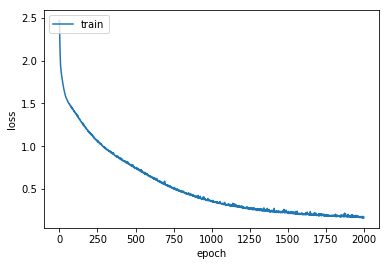

In [13]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [14]:
# 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 2ms/step
acc: 92.00%


In [15]:
# 모델 사용하기
pred_count = 50   # 최대 예측 개수 정의

In [16]:
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### [노래 듣기](http://tykimos.github.io/warehouse/2017-4-9-MLP_one_step_prediction.mp3)

In [19]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


#### [노래듣기](http://tykimos.github.io/warehouse/2017-4-9-MLP_full_song_prediction.mp3)